Notes: 

First and foremost this notebook starts with machinelearningmastery.com's excellent tutorial: 
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

I have also been studying Deep Learning with Andrew Ng and deeplearning.ai's coursera course, and Fast.ai's course, and highly recommend both to interested learners. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.callbacks import ModelCheckpoint

from keras.utils import np_utils





/Users/rosscheung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/rosscheung/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
len(X_train)

60000

# Let's plot the first dozen MNIST files in the training set

There are 60,000 in total, so don't plot them all....

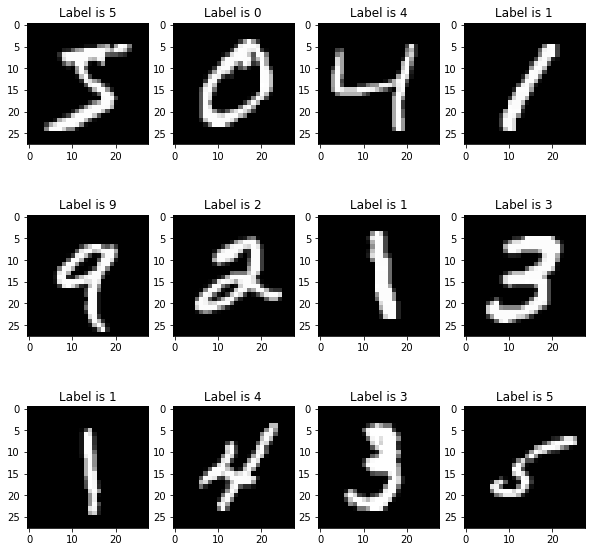

In [5]:
plt.figure(figsize=(10,10))
for i in range(0,12): 

    pixels = X_train[i]
    
    plt.subplot(3, 4, i+1)
    plt.title('Label is {label}'.format(label=y_train[i]))
    plt.imshow(pixels, cmap='gray')

plt.show()


### Let's convert the images into single dimension arrays

Should be ~784 total

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2] 

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)



### Now we normalize the image pixel data from 0-255, to 0-1

https://en.wikipedia.org/wiki/Feature_scaling

In [7]:

X_train = X_train / 255
X_test = X_test / 255


## Convert y_train and y_test into categorical variables of the numbers from 0 to 9. 

Luckily Keras has a handy utility for this

In [8]:

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

num_classes

10

### Let's define a simple neural network  model here

This includes the dimensions (e.g. depth of the model) here

In [9]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2811 - acc: 0.9199 - val_loss: 0.1349 - val_acc: 0.9610
Epoch 2/10
 - 3s - loss: 0.1118 - acc: 0.9675 - val_loss: 0.0917 - val_acc: 0.9738
Epoch 3/10
 - 3s - loss: 0.0718 - acc: 0.9794 - val_loss: 0.0845 - val_acc: 0.9741
Epoch 4/10
 - 3s - loss: 0.0502 - acc: 0.9853 - val_loss: 0.0689 - val_acc: 0.9800
Epoch 5/10
 - 3s - loss: 0.0367 - acc: 0.9901 - val_loss: 0.0661 - val_acc: 0.9797
Epoch 6/10
 - 3s - loss: 0.0268 - acc: 0.9926 - val_loss: 0.0631 - val_acc: 0.9804
Epoch 7/10
 - 3s - loss: 0.0191 - acc: 0.9951 - val_loss: 0.0571 - val_acc: 0.9819
Epoch 8/10
 - 3s - loss: 0.0144 - acc: 0.9965 - val_loss: 0.0646 - val_acc: 0.9805
Epoch 9/10
 - 3s - loss: 0.0111 - acc: 0.9975 - val_loss: 0.0643 - val_acc: 0.9804
Epoch 10/10
 - 3s - loss: 0.0084 - acc: 0.9984 - val_loss: 0.0568 - val_acc: 0.9830


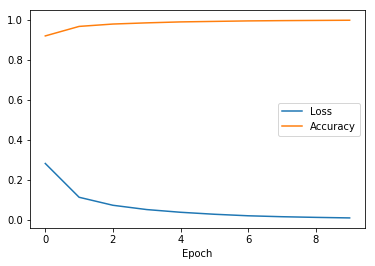

In [11]:
#plt.figure(figsize=(10,10))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Convolutional Neural Networks

Or, can we do better?

First, let's load the MNIST data again, and reshape it to be:

    [samples][pixels][width][height]


In [30]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [31]:
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


10

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Note that this is fit on the same 10 epochs/200 batch size as the neural network above

In [15]:

model = baseline_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 73s - loss: 0.2486 - acc: 0.9276 - val_loss: 0.0768 - val_acc: 0.9769
Epoch 2/10
 - 74s - loss: 0.0747 - acc: 0.9778 - val_loss: 0.0566 - val_acc: 0.9819
Epoch 3/10
 - 74s - loss: 0.0541 - acc: 0.9838 - val_loss: 0.0439 - val_acc: 0.9862
Epoch 4/10
 - 74s - loss: 0.0408 - acc: 0.9871 - val_loss: 0.0366 - val_acc: 0.9880
Epoch 5/10
 - 75s - loss: 0.0338 - acc: 0.9894 - val_loss: 0.0320 - val_acc: 0.9881
Epoch 6/10
 - 75s - loss: 0.0292 - acc: 0.9910 - val_loss: 0.0323 - val_acc: 0.9891
Epoch 7/10
 - 75s - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0345 - val_acc: 0.9891
Epoch 8/10
 - 75s - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0393 - val_acc: 0.9876
Epoch 9/10
 - 76s - loss: 0.0173 - acc: 0.9943 - val_loss: 0.0416 - val_acc: 0.9876
Epoch 10/10
 - 75s - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0329 - val_acc: 0.9885
CNN Error: 1.15%


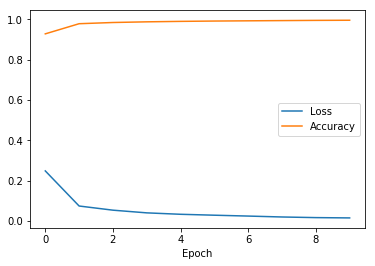

In [16]:
#plt.figure(figsize=(10,10))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [17]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(1, 28, 28), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax')) 
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Let's make an even bigger model!

Complete with dropout (ignoring a random amount of neurons) to avoid overfitting, and with additional layers

In [18]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model = larger_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.3766 - acc: 0.8821 - val_loss: 0.0779 - val_acc: 0.9753
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0917 - acc: 0.9719 - val_loss: 0.0458 - val_acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0677 - acc: 0.9788 - val_loss: 0.0390 - val_acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0302 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0283 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0397 - acc: 0.9873 - val_loss: 0.0252 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0332 - val_acc

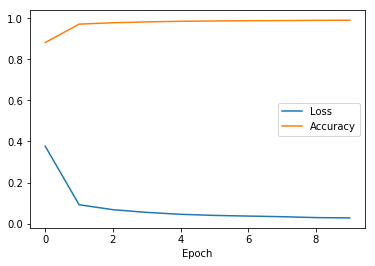

In [20]:

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Using Image Preprocessing in Keras

This will rotate images to generate more data in more formats. 

For more info see: 
https://keras.io/preprocessing/image/

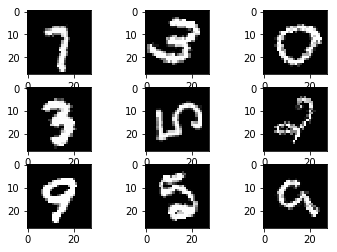

In [24]:
from keras.preprocessing.image import ImageDataGenerator


(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
datagen = ImageDataGenerator(rotation_range=90, featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)


datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break

In [36]:
from sklearn.model_selection import train_test_split
# As far as I can tell the validation_data keyword doesn't exist for fit_generator
x_train_small, x_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [39]:
model = larger_model()
history = model.fit_generator(datagen.flow(x_train_small, y_train_small, batch_size=32), 
                              validation_data= (x_val, y_val),  epochs=10)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1688/1688 [==============================] - 98s 58ms/step - loss: 0.4820 - acc: 0.8442 - val_loss: 0.1565 - val_acc: 0.9513
Epoch 2/10
1688/1688 [==============================] - 91s 54ms/step - loss: 0.2062 - acc: 0.9363 - val_loss: 0.1229 - val_acc: 0.9638
Epoch 3/10
1688/1688 [==============================] - 80s 47ms/step - loss: 0.1640 - acc: 0.9486 - val_loss: 0.0906 - val_acc: 0.9735
Epoch 4/10
1688/1688 [==============================] - 75s 44ms/step - loss: 0.1453 - acc: 0.9551 - val_loss: 0.0902 - val_acc: 0.9722
Epoch 5/10
1688/1688 [==============================] - 75s 44ms/step - loss: 0.1299 - acc: 0.9596 - val_loss: 0.0853 - val_acc: 0.9743
Epoch 6/10
1688/1688 [==============================] - 74s 44ms/step - loss: 0.1257 - acc: 0.9596 - val_loss: 0.0887 - val_acc: 0.9730
Epoch 7/10
1688/1688 [==============================] - 75s 44ms/step - loss: 0.1157 - acc: 0.9647 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 8/10
1688/1688 [==========================